# cài thư viện

In [ ]:
!pip install matplotlib opencv-python

# Import thư viện

In [321]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh

(-0.5, 973.5, 831.5, -0.5)

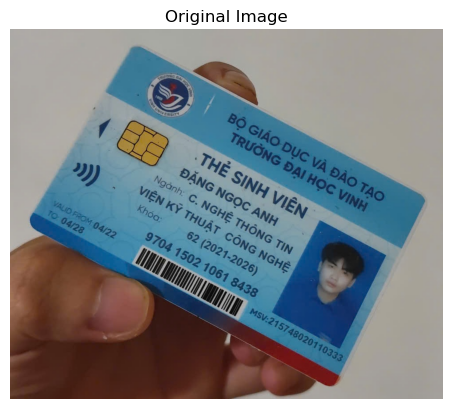

In [324]:
# image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_1.jpg"
# image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_2.jpg"
# image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_3.jpg"
image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_4.jpg"
image=cv2.imread(image_path)
# plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Làm xám ảnh

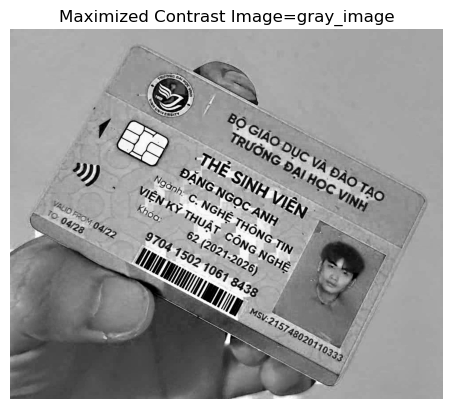

In [327]:
def extractValue(image):
    # Kiểm tra kích thước ảnh
    height, width, numChannels = image.shape
    imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Chuyển đổi ảnh từ BGR sang HSV
    
    # Tách các kênh HSV
    imgHue, imgSaturation, imgValue = cv2.split(imgHSV)
    
    # Trả về kênh Value (độ sáng)
    return imgValue

def maximizeContrast(imgGrayscale):
    # Kiểm tra kích thước ảnh
    height, width = imgGrayscale.shape
    
    # Tạo ảnh mới để lưu kết quả TopHat và BlackHat
    structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Tạo kernel 3x3
    
    # Phép toán TopHat và BlackHat
    imgTopHat = cv2.morphologyEx(imgGrayscale, cv2.MORPH_TOPHAT, structuringElement, iterations=10)  # Nổi bật chi tiết sáng
    imgBlackHat = cv2.morphologyEx(imgGrayscale, cv2.MORPH_BLACKHAT, structuringElement, iterations=10)  # Nổi bật chi tiết tối
    
    # Thêm TopHat vào ảnh gốc và trừ BlackHat để tăng độ tương phản
    imgGrayscalePlusTopHat = cv2.add(imgGrayscale, imgTopHat) 
    imgGrayscalePlusTopHatMinusBlackHat = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

    # Trả về ảnh với độ tương phản tối ưu
    return imgGrayscalePlusTopHatMinusBlackHat

# Extract the Value channel
imgGrayscale = extractValue(image)

# Tăng cường độ tương phản
imgMaxContrastGrayscale = maximizeContrast(imgGrayscale)
gray_image=imgMaxContrastGrayscale
# Hiển thị ảnh kết quả
plt.imshow(gray_image, cmap='gray')
plt.title('Maximized Contrast Image=gray_image')
plt.axis('off')
plt.show()

# Tăng độ tương phản bằng CLAHE (Adaptive Histogram Equalization)

(-0.5, 973.5, 831.5, -0.5)

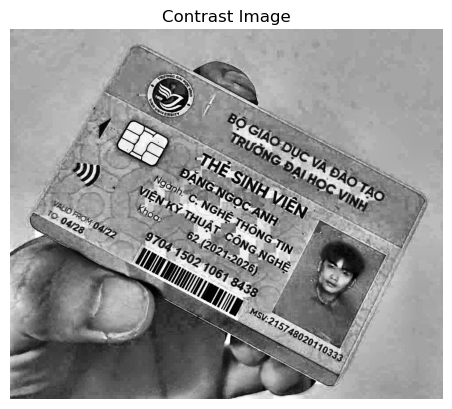

In [330]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_image = clahe.apply(gray_image)

# plt.subplot(3, 3, 3)
plt.imshow(contrast_image, cmap='gray')
plt.title('Contrast Image')
plt.axis('off')

# Giảm nhiễu bằng bộ lọc Gauss

(-0.5, 973.5, 831.5, -0.5)

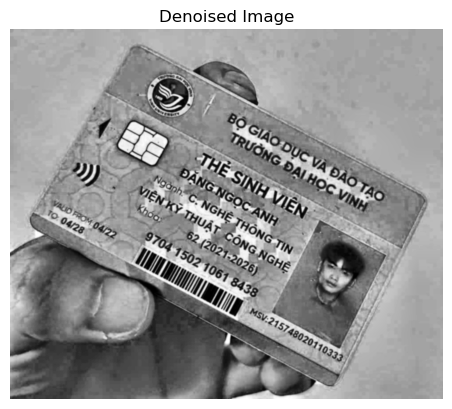

In [333]:
denoised_image = cv2.GaussianBlur(contrast_image, (5, 5), 0)

# plt.subplot(3, 3, 4)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

# Nhị phân hoá ảnh với ngưỡng động (Adaptive Thresholding)

(-0.5, 973.5, 831.5, -0.5)

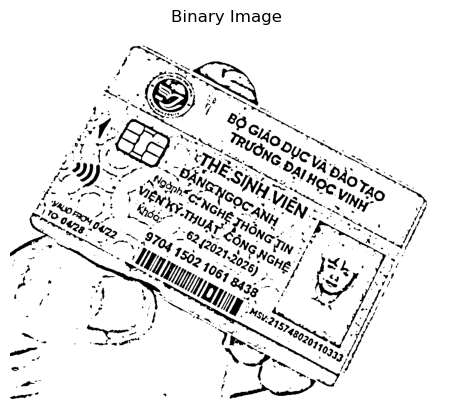

In [336]:
# binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 19, 19)

# plt.subplot(3, 3, 5)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Phát hiện cạnh với biên Canny

(-0.5, 973.5, 831.5, -0.5)

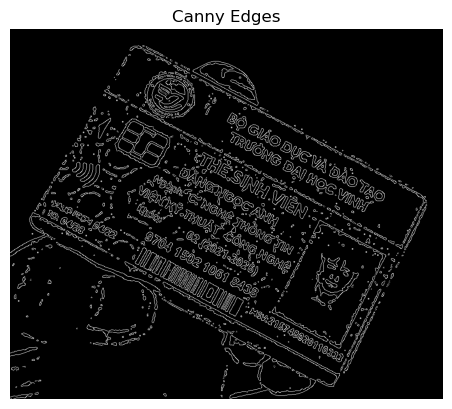

In [339]:
edges = cv2.Canny(binary_image, threshold1=150, threshold2=255)

# plt.subplot(3, 3, 6)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

In [341]:
# Hàm để cập nhật kết quả Canny khi thay đổi ngưỡng
# def update_canny(threshold1, threshold2):
#     edges = cv2.Canny(blurred, threshold1, threshold2)
    
#     # Hiển thị ảnh kết quả
#     plt.figure(figsize=(10, 10))
#     plt.imshow(edges, cmap='gray')
#     plt.title(f'Canny Edges: threshold1={threshold1}, threshold2={threshold2}')
#     plt.axis('off')
#     plt.show()

# # Tạo slider cho ngưỡng Canny
# threshold1_slider = widgets.IntSlider(value=50, min=0, max=255, step=1, description='Threshold 1:')
# threshold2_slider = widgets.IntSlider(value=150, min=0, max=255, step=1, description='Threshold 2:')

# # Kết nối slider với hàm cập nhật
# widgets.interactive(update_canny, threshold1=threshold1_slider, threshold2=threshold2_slider)
# display(threshold1_slider, threshold2_slider)

# Tìm và lọc kết quả thẻ sinh viên bằng Contour

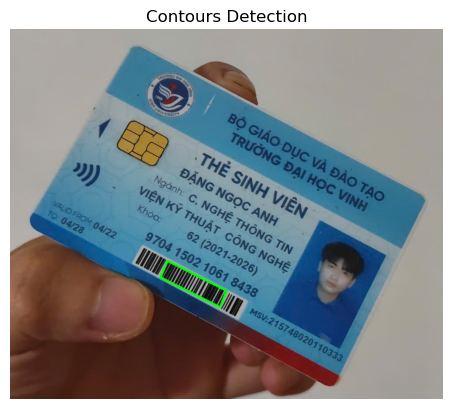

In [319]:
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1) 
# Tìm các contour
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sắp xếp và lấy 10 contour lớn nhất
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

screenCnt = []
for c in contours:
    peri = cv2.arcLength(c, True)  # Tính chu vi
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)  # Làm xấp xỉ đa giác, chỉ giữ các contour có 4 cạnh
    
    if len(approx) == 4:  # Nếu có 4 cạnh (hình chữ nhật hoặc vuông)
        screenCnt.append(approx)

# Kiểm tra nếu screenCnt có chứa contour
if len(screenCnt) == 0:
    detected = 0
    print("No card detected")
else:
    detected = 1

# Nếu tìm thấy thẻ (hình chữ nhật), vẽ contour lên ảnh
if detected == 1:
    contour_image = image.copy()
    for cnt in screenCnt:
        cv2.drawContours(contour_image, [cnt], -1, (0, 255, 0), 3)

# Hiển thị ảnh kết quả
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Detection')
plt.axis('off')
plt.show()

# Toàn bộ chương trình

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc ảnh
image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped.jpg"
image=cv2.imread(image_path)

# 2. Làm xám ảnh
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Tăng độ tương phản bằng CLAHE (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
contrast_image = clahe.apply(gray_image)

# 4. Giảm nhiễu bằng bộ lọc Gauss
denoised_image = cv2.GaussianBlur(contrast_image, (5, 5), 0)

# 5. Nhị phân hoá ảnh với ngưỡng động (Adaptive Thresholding)
binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# 6. Phát hiện cạnh với biên Canny
edges = cv2.Canny(binary_image, threshold1=50, threshold2=150)

# 7. Tìm và lọc kết quả thẻ sinh viên bằng Contour
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Lọc các contour có diện tích lớn để tìm thẻ sinh viên
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

# Vẽ contour lên ảnh gốc để xem kết quả
contour_image = image.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (0, 255, 0), 3)

# Hiển thị kết quả từng bước
plt.figure(figsize=(12, 12))

# 1. Ảnh gốc
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# 2. Ảnh xám
plt.subplot(3, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

# 3. Ảnh tăng độ tương phản
plt.subplot(3, 3, 3)
plt.imshow(contrast_image, cmap='gray')
plt.title('Contrast Image')
plt.axis('off')

# 4. Ảnh giảm nhiễu
plt.subplot(3, 3, 4)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

# 5. Ảnh nhị phân hoá
plt.subplot(3, 3, 5)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# 6. Canny Edge Detection
plt.subplot(3, 3, 6)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

# 7. Kết quả Contour
plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\test\Rotate-Image\cropped_1.jpg"
image=cv2.imread(image_path)

# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mờ ảnh để giảm nhiễu
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Phát hiện cạnh bằng Canny
edges = cv2.Canny(blurred, 50, 150)

# Tìm các đường thẳng trong ảnh bằng Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

# Tạo một bản sao ảnh để vẽ kết quả
line_image = image.copy()

# Vẽ các đường thẳng lên ảnh
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hiển thị các đường thẳng phát hiện được
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines Using Hough Transform')
plt.axis('off')
plt.show()

# Bước tiếp theo: Phát hiện các góc vuông và tìm 4 điểm của hình chữ nhật (sử dụng phương pháp tự chọn).
# Sau đó, bạn có thể áp dụng Perspective Transform để cắt thẻ sinh viên nếu phát hiện 4 góc vuông.

